In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


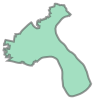

In [6]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [8]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


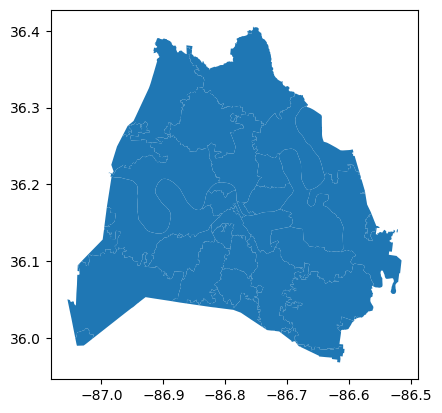

In [10]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


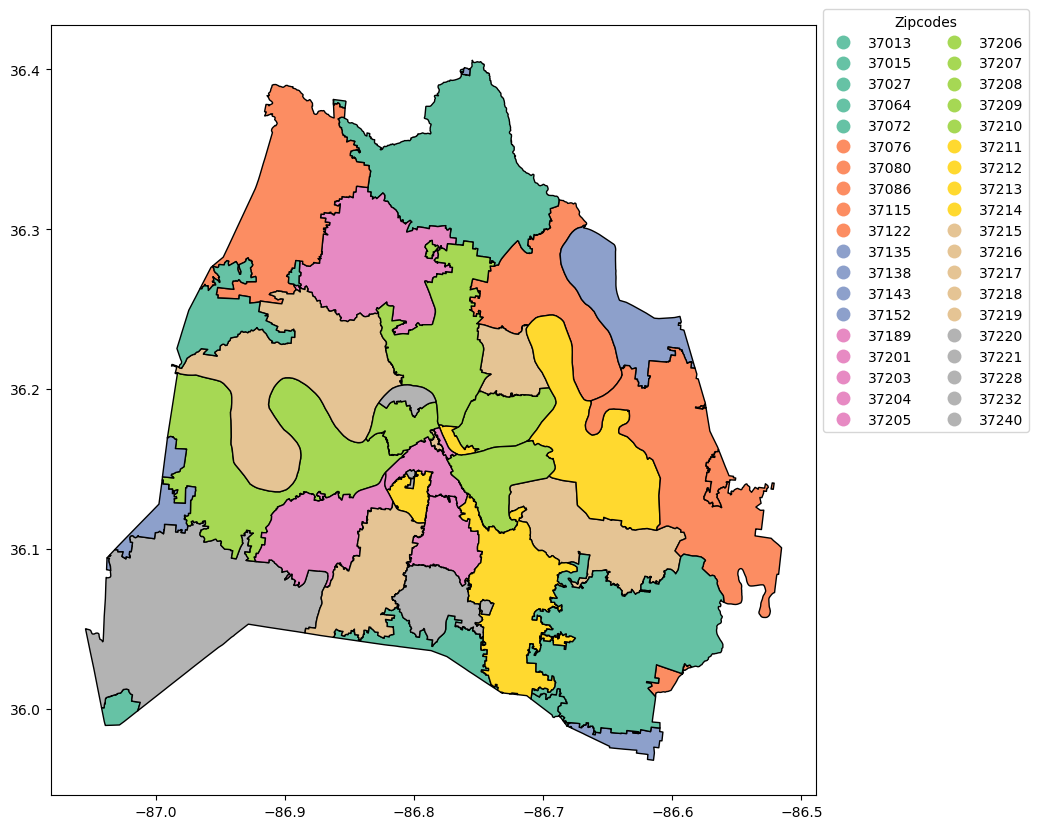

In [12]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the trash_pickup data
- trash_hauler_report_with_lat_lng.csv from trash_pickup_exercise
- cleaned:
    - parse `LATITUDE` and `LONGITUDE`
- print the shape 
- take a look at the first 3 rows

In [14]:
trash_pickup = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
print(trash_pickup.shape)
trash_pickup.head(3)

(20226, 13)


,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923


In [15]:
trash_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


- you want the CRS for the missed_pickup to match the CRS in the zipcodes GeoDataFrame 


In [17]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [19]:
trash_geo = gpd.GeoDataFrame(trash_pickup, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(trash_pickup.LONGITUDE, trash_pickup.LATITUDE))

In [20]:
type(trash_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine missed_pickup and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **missed_pickups within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [22]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [23]:
missed_pickup_by_zip = gpd.sjoin(trash_geo, zipcodes, predicate = 'within')

In [24]:
missed_pickup_by_zip.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE,geometry,index_right,zip,po_name
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292,POINT (-86.81539 36.21729),42,37207,NASHVILLE
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470,POINT (-86.83810 36.21347),27,37218,NASHVILLE
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923,POINT (-86.88556 36.14292),12,37209,NASHVILLE
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652,POINT (-86.78917 36.21265),42,37207,NASHVILLE
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861,POINT (-86.87499 36.15486),12,37209,NASHVILLE


#### Now that the data is joined spatially you can count the missed_pickup by zip code  and see how many missed_pickup are within each polygon 
- using the `value_counts()` method


In [26]:
missed_pickup_by_zip['zip'].value_counts()

zip
37013    2280
37211    2240
37205    1492
37209    1413
37215    1402
37207    1302
37115    1270
37206    1218
37208    1042
37214    1005
37218     983
37216     841
37217     836
37204     639
37212     601
37210     554
37203     393
37220     299
37027     168
37189      60
37221      48
37219      43
37201      35
37076       5
37138       5
37086       3
37213       1
37228       1
Name: count, dtype: int64

#### Let's take a closer look at the 1005 missed_pickup in the 37214 zip code
- filter the missed_pickup_by_zip data to just get missed_pickup in 37214
- filter the zip code geodataframe to just the polygon (row) for 37214


In [28]:
missed_pickup_37214 = missed_pickup_by_zip.loc[missed_pickup_by_zip['zip'] == '37214']
missed_pickup_37214.shape

(1005, 17)

In [29]:
polygon37214 = zipcodes.loc[zipcodes['zip'] == '37214']
polygon37214.shape

(1, 3)

#### Now plot these two together
- first plot the polygons for 37214 and make them light blue
- next plot the points for the missed_pickupand color them by Incident Address

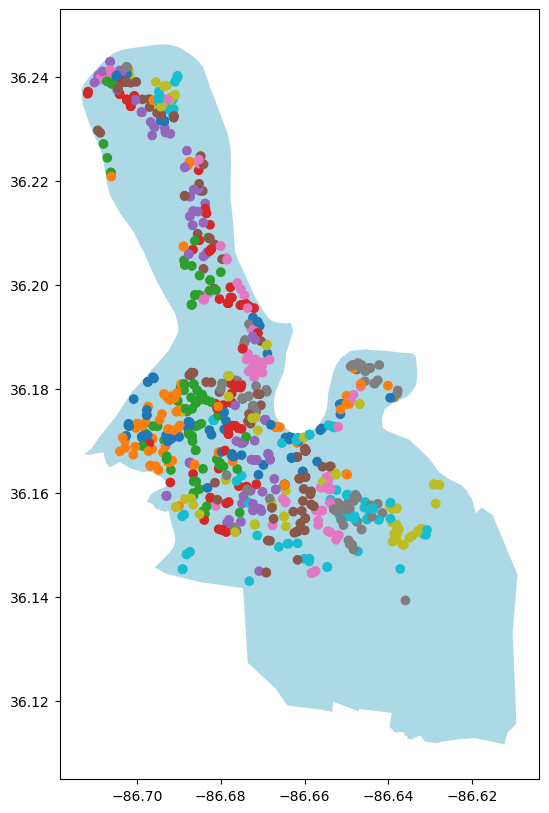

In [31]:
#fig, ax = matplotlib.subplots()
ax = polygon37214.plot(figsize = (8, 10), color = 'lightblue')
missed_pickup_37214.plot( ax = ax, column = 'Incident Address');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [34]:
polygon37214

,zip,po_name,geometry
37,37214,NASHVILLE,"MULTIPOLYGON (((-86.65585 36.11824, -86.66410 ..."


In [35]:
polygon37214.geometry.centroid

C:\Users\janvi\AppData\Local\Temp\ipykernel_33148\3949195503.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37214.geometry.centroid


37    POINT (-86.66271 36.16744)
dtype: geometry

In [36]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37214.geometry.centroid[37]
print(center)

POINT (-86.6627148391345 36.167438751857254)


C:\Users\janvi\AppData\Local\Temp\ipykernel_33148\2190246309.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37214.geometry.centroid[37]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [38]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.167438751857254, -86.6627148391345]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [40]:
#create our map of Nashville Zip Code 37214 and show it
map_37214 = folium.Map(location =  area_center, zoom_start = 12)
map_37214

#### Next, let's add our 37214 polygon and missed_pickup markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of missed_pickup in 37214. 
- This idea will be helpful for creating our markers!

In [43]:
i = 0
for row_index, row_values in missed_pickup_37214.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 16
values are:
 
Request Number                                             25393
Date Opened                                            11/1/2017
Request                               Trash Collection Complaint
Description         trash carts all tossed in road after pick up
Incident Address                               2720 riverbend dr
Zip Code                                                 37214.0
Trash Hauler                                           RED RIVER
Trash Route                                                 1501
Council District                                            15.0
State Plan X                                         1762455.924
State Plan Y                                         693225.6657
LONGITUDE                                             -86.698647
LATITUDE                                               36.235731
geometry                        POINT (-86.69864711 36.23573116)
index_right                                                   37

#### Create map_37214 again with additional features:
- add the zipcode area outline (polygon_37214)
- iterate through the missed_pickup_37214 to
    - create location from each LATITUDE and LONGITUDE
    - create a popup from the request column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37214`
- display `map_37214`

In [45]:
#draw our zip code area: 37214
map_37214 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37214).add_to(map_37214)

#iterate through missed_pickup_37214 to create locations and markers 
#for each missed_pickup
#remember for Folium locations, lat is listed first!!

for row_index, row_values in missed_pickup_37214.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = str(row_values['Incident Address'])
    icon=folium.Icon(color="blue",icon="truck", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37214)
map_37214.save('../maps/map37214.html')

#display our map
map_37214

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [48]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: int = 0,
    max_zoom: int = 18,
    zoom_start: int = 10,
    min_lat: int = -90,
    max_lat: int = 90,
    min_lon: int = -180,
    max_lon: int = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: bool = True,
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tile

In [49]:
cluster_map_37214 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37214)

folium.GeoJson(polygon37214).add_to(cluster_map_37214)

# inside the loop add each marker to the cluster
for row_index, row_values in missed_pickup_37214.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = str(row_values['Incident Address'])
    icon=folium.Icon(color="blue",icon="truck", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37214.save('../maps/cluster37214.html')

cluster_map_37214

In [50]:
#draw our zip code area: 37214
map_37214 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37214).add_to(map_37214)

#create a list of locations and pass them to FastMarkerCluster()
locations = missed_pickup_37214[['LATITUDE', 'LONGITUDE']].values.tolist()
map_37214.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37214